In [1]:
import numpy as np
import pandas as pd
import random as rd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap

In [2]:
pillow = pd.read_csv("SaYoPillow.csv")
pillow.sort_values(
['stress'],
axis=0,
inplace=True,
na_position='first')

In [3]:
class Perceptron:
    """
    Perceptron neuron
    """

    def __init__(self, learning_rate=0.1):
        """
        instantiate a new Perceptron

        :param learning_rate: coefficient used to tune the model
        response to training data
        """
        self.learning_rate = learning_rate
        self._b = 0.0  # y-intercept
        self._w = None  # weights assigned to input features
        # count of errors during each iteration
        self.misclassified_samples = []
    #n_iter=10
    def fit(self, x: np.array, y: np.array, n_iter=100):
        """
        fit the Perceptron model on the training data

        :param x: samples to fit the model on
        :param y: labels of the training samples
        :param n_iter: number of training iterations 
        """
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(n_iter):
            # counter of the errors during this training iteration
            errors = 0
            for xi, yi in zip(x, y):
                # for each sample compute the update value
                update = self.learning_rate * (yi - self.predict(xi))
                # and apply it to the y-intercept and weights array
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)

            self.misclassified_samples.append(errors)

    def f(self, x: np.array) -> float:
        """
        compute the output of the neuron
        :param x: input features
        :return: the output of the neuron
        """
        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        """
        convert the output of the neuron to a binary output
        :param x: input features
        :return: 1 if the output for the sample is positive (or zero),
        -1 otherwise
        """
        return np.where(self.f(x) >= 0, 1, -1)

In [4]:
pillow.head()

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
154,49.00,17.600,98.400,7.200,96.600,76.00,8.600,54.00,0
145,46.92,16.768,97.152,5.536,95.768,67.68,7.768,51.92,0
146,48.76,17.504,98.256,7.008,96.504,75.04,8.504,53.76,0
147,45.08,16.032,96.048,4.064,95.032,60.32,7.032,50.08,0
148,45.12,16.048,96.072,4.096,95.048,60.48,7.048,50.12,0


C:\Users\blumi\AppData\Local\Temp/ipykernel_10632/658928751.py:19: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x[252:378, 0], x[252:378, 1], x[252:378, 2], color='green',
C:\Users\blumi\AppData\Local\Temp/ipykernel_10632/658928751.py:21: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x[378:504, 0], x[378:504, 1], x[378:504, 2], color='yellow',
C:\Users\blumi\AppData\Local\Temp/ipykernel_10632/658928751.py:23: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x[504:630, 0], x[504:630, 1], x[504:630, 2], color='purple',

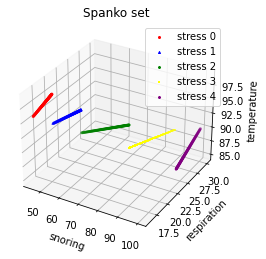

In [5]:
# extract the label column
y=pillow.iloc[:,8].values
# extract features
x=pillow.iloc[:,0:7].values

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_title('Spanko set')
ax.set_xlabel("snoring")
ax.set_ylabel("respiration")
ax.set_zlabel("temperature")

# plot the samples
ax.scatter(x[:126, 0], x[:126, 1], x[:126,2], color='red', 
           marker='o', s=4, edgecolor='red', label="stress 0")
ax.scatter(x[126:252, 0], x[126:252, 1], x[126:252, 2], color='blue', 
           marker='^', s=4, edgecolor='blue', label="stress 1")
ax.scatter(x[252:378, 0], x[252:378, 1], x[252:378, 2], color='green', 
           marker='x', s=4, edgecolor='green', label="stress 2")
ax.scatter(x[378:504, 0], x[378:504, 1], x[378:504, 2], color='yellow', 
           marker='+', s=4, edgecolor='green', label="stress 3")
ax.scatter(x[504:630, 0], x[504:630, 1], x[504:630, 2], color='purple', 
           marker='x', s=4, edgecolor='green', label="stress 4")

plt.legend(loc='upper right')
plt.show()

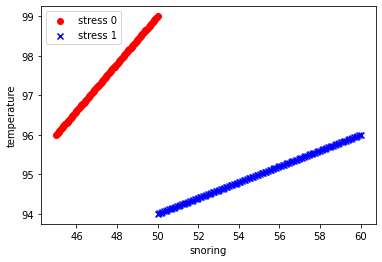

In [6]:
x = x[0:252, 0:3:2] # reduce the dimensionality of the data
y = y[0:252]

# plot stress0 samples
plt.scatter(x[:126, 0], x[:126, 1], color='red', marker='o', label='stress 0')
# plot stress1 samples
plt.scatter(x[126:252, 0], x[126:252, 1], color='blue', marker='x', label='stress 1')

# show the legend
plt.xlabel("snoring")
plt.ylabel("temperature")
plt.legend(loc='upper left')

# show the plot
plt.show()


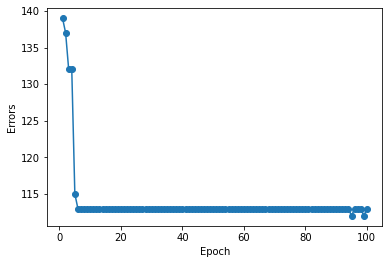

accuracy 0.631579


In [7]:
from sklearn.model_selection import train_test_split


# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,
                                                    random_state=0)
#when test_size>0.15, accuracy is around 50% which may cause problems later on

# train the model
classifier = Perceptron(learning_rate=0.1)
classifier.fit(x_train, y_train)

# plot the number of errors during each iteration
plt.plot(range(1, len(classifier.misclassified_samples) + 1),
         classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()
from sklearn.metrics import accuracy_score
print("accuracy %f" % accuracy_score(classifier.predict(x_test), y_test))

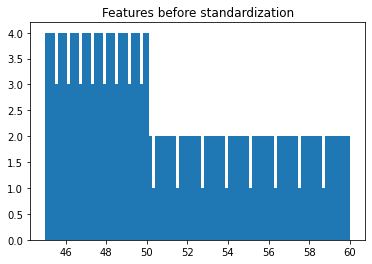

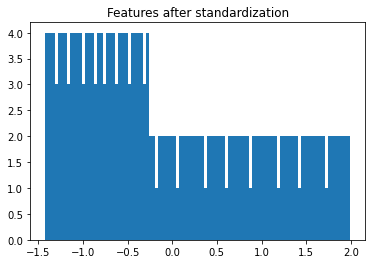

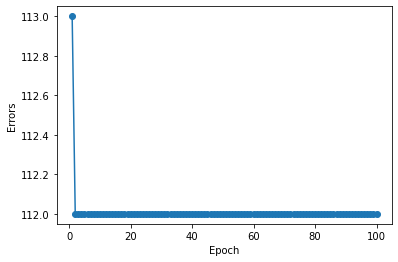

accuracy 0.631579


In [8]:
# plot the first feature before standardization
plt.hist(x[:, 0], bins=100)
plt.title("Features before standardization")
plt.show()

# standardization of the two features
x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

# features after standardization
plt.hist(x[:, 0], bins=100)
plt.title("Features after standardization")
plt.show()

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,
                                                    random_state=0)
#when test_size>0.15 the graph does not show values separated correctly 

# train the model
classifier = Perceptron(learning_rate=0.1)
classifier.fit(x_train, y_train)

# plot the number of errors during each iteration
plt.plot(range(1, len(classifier.misclassified_samples) + 1),
         classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()

from sklearn.metrics import accuracy_score
print("accuracy %f" % accuracy_score(classifier.predict(x_test), y_test))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


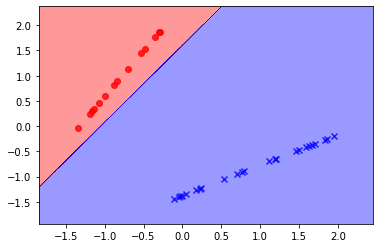

In [9]:
def plot_decision_regions(x, y):
    resolution = 0.001
    
    # define a set of markers
    markers = ('o', 'x')
    # define available colors
    cmap = ListedColormap(('red', 'blue'))
    
    # select a range of x containing the scaled test set
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    
    # create a grid of values to test the classifier on
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # plot the decision region...
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # ...and the points from the test set
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c1, 0],
                    y=x[y == c1, 1], 
                    alpha=0.8, 
                    c=cmap(idx), 
                    marker=markers[idx], 
                    label=c1)
    plt.show()


plot_decision_regions(x_test, y_test)